```{currentmodule} optimap
```

In [ ]:
from optimap.utils import jupyter_render_animation as render

```{tip}
Download this tutorial as a {download}`Jupyter notebook <converted/apd.ipynb>`, or as a {download}`python script <converted/apd.py>` with code cells. We highly recommend using [Visual Studio Code](#vscode) to execute this tutorial.
```

# Tutorial 9: Action Potential Duration

```{warning}
This tutorial is currently and APD computation functionality in preparation. We will add more information soon.
```

This tutorial discusses how to compute action potential durations (APDs) and APD maps from cardiac optical mapping data using ``optimap``. The routines include detecting action potential upstrokes and repolarization times and can also be used to compute calcium transient durations (CaTDs) or CaTD maps. In addition, we will also compute APD and CaTD histograms.

First, we will load a voltage- and calcium-sensitive optical mapping recording, see [Example Data Files](example_files.ipynb) for more information, and extract the two channels/videos from the recording:

In [ ]:
import optimap as om

filename = om.download_example_data("Dualchannel_1.npy")

video_voltage = om.load_video(filename, start_frame=0, step=2)  # even frames
video_calcium = om.load_video(filename, start_frame=1, step=2)  # odd frames

You can plot optical traces interactively as follows:

In [ ]:
om.compare_traces([video_voltage, video_calcium], labels=["Voltage", "Calcium"], size=3, fps=1000)

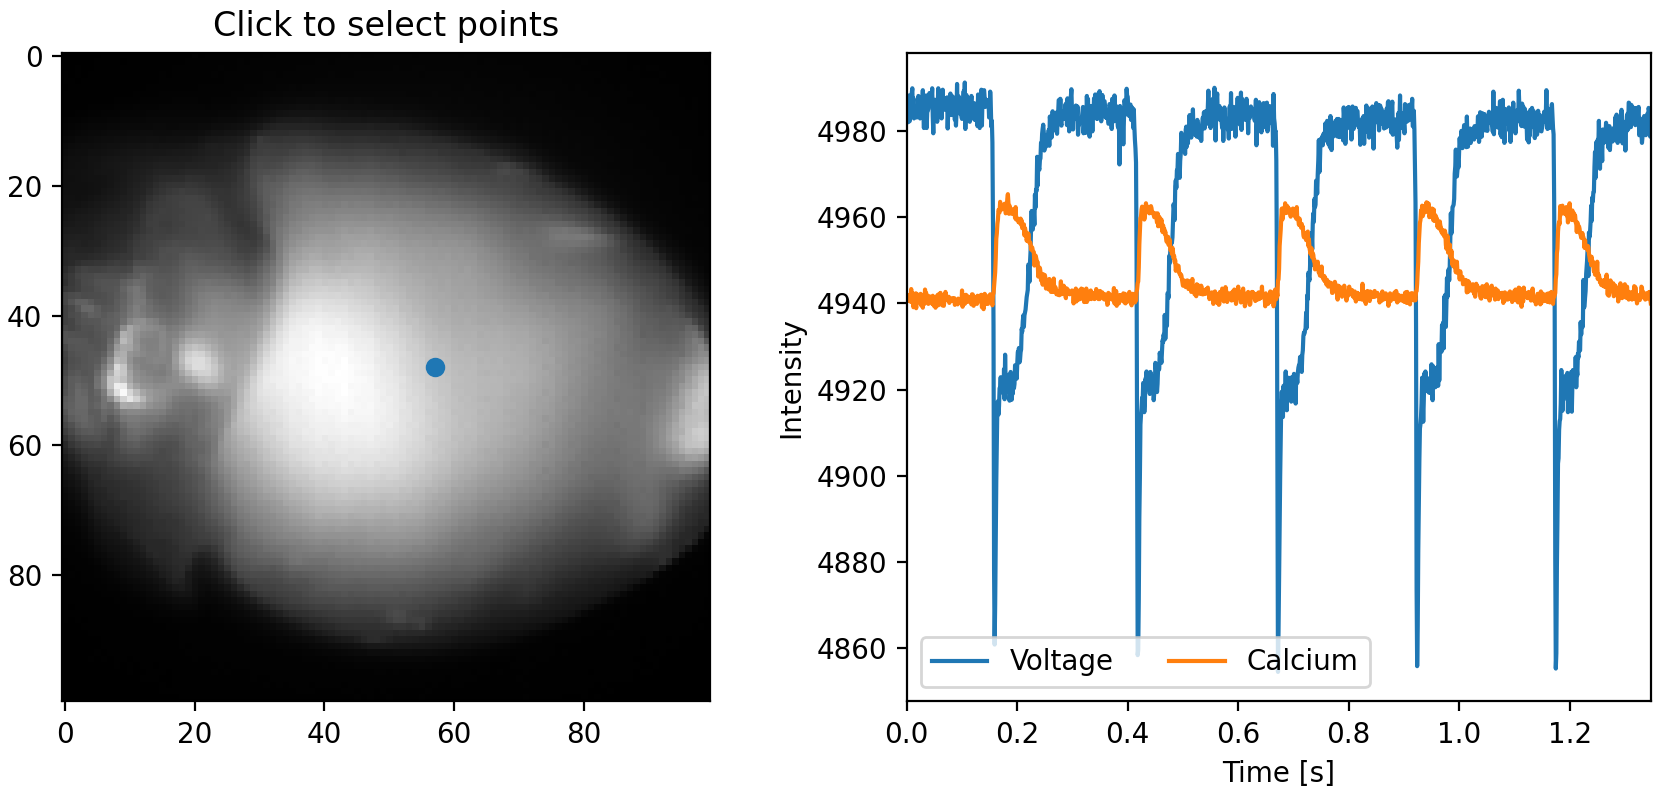

or define a position (or multiple positions):

In [ ]:
position = [(51, 61)]
# positions = [(51, 61), (50, 70)]

and then display the corresponding optical traces manually. The corresponding action potential trace looks as follows:

In [ ]:
trace_v = om.extract_traces(video_voltage, position, size=3, show=True, fps=1000)

and the corresponding calcium trace looks as follows:

In [ ]:
trace_ca = om.extract_traces(video_calcium, position, size=3, show=True, fps=1000, colors=['orange'])

In order to plot the voltage and calcium traces in the same graph, we need to normalize the data:

In [ ]:
video_voltage_norm = om.video.normalize_pixelwise(video_voltage)
# switch the polarity of the voltage data
video_voltage_norm = 1.0 - video_voltage_norm

# Scale Ca signal to [0, 0.65] to match the voltage potentials (there is no absolute value of the signals)
video_calcium_norm = om.video.normalize_pixelwise(video_calcium, ymax=0.65)

The comparison reveals a slight delay in the calcium transient:

In [ ]:
t1 = 50
t2 = 350
om.compare_traces([video_voltage_norm, video_calcium_norm], position, size=3, fps=1000)
om.compare_traces([video_voltage_norm[t1:t2], video_calcium_norm[t1:t2]], position, size=3)

In this recording, the action potential exhibits the characteristic notch during the depolarization phase. The notch is often not visible in cardiac optical mapping data and ``optimap`` will by default assume that there is no notch. This is relevant when computing action potential durations (APDs) for certain heights of the action potential (e.g. APD50 at 50% of the height of the action potential). Here, we normalize the trace with clipping (``vmax=0.58``) to remove the notch: 

In [ ]:
trace_v_norm = om.trace.normalize(trace_v)
trace_v_norm = om.trace.normalize(1-trace_v_norm,vmax=0.58)

om.show_traces(trace_v_norm)
om.show_traces(trace_v_norm[t1:t2])